In [4]:
from scipy.stats import norm
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier



In [5]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
  # --------- Insert your code here --------- #
  d1 = (np.log(S0/K)+(r+(sigma**2)/2)*(T))/(sigma * np.sqrt(T))
  d2 = d1-sigma*(np.sqrt(T))
  c = norm.cdf(d1)*S0-norm.cdf(d2)*K*(np.exp(-r*(T))) # call option
  p = norm.cdf(-d2)*K*(np.exp(-r*(T)))-norm.cdf(-d1)*S0 # put option

  return c, p

In [6]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #
  paths = np.zeros((numSteps+1,numPaths)) 
  call_payoff = np.zeros((numPaths,1))
  put_payoff = np.zeros((numPaths,1))

  # dT is the time increment (in years)
  dT = T/numSteps
  paths[0] = [S0]*numPaths # initial price of path
  
  # MC simulation of prices
  for iPath in range(numPaths):
      for iStep in range(numSteps):
          paths[iStep+1,iPath] = paths[iStep,iPath]*np.exp((mu-0.5*sigma**2)*dT+sigma*np.sqrt(dT)*np.random.normal(0,1))
          
  for iPath in range(numPaths):
      call_payoff[iPath] = np.maximum(paths[numSteps,iPath]-K,0)*np.exp(-r*T)
      put_payoff[iPath] = np.maximum(K-paths[numSteps,iPath],0)*np.exp(-r*T)
  
  c = np.mean(call_payoff)
  p = np.mean(put_payoff)

  return c, p, paths

In [22]:
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #
  paths = np.zeros((numSteps+1,numPaths))
  call_payoff = np.zeros((numPaths,1))
  put_payoff = np.zeros((numPaths,1))
  temp = np.zeros((numPaths,1))

  # dT is the time increment (in years)
  dT = T/numSteps
  paths[0] = [S0]*numPaths # initial price of path

  
  # MC simulation of prices
  for iPath in range(numPaths):
      for iStep in range(numSteps):
          paths[iStep+1,iPath] = paths[iStep,iPath]*np.exp((mu-0.5*sigma**2)*dT+sigma*np.sqrt(dT)*np.random.normal(0,1))
  
  # determine if price is higher than barrier
  for iPath in range(numPaths):
      temp[iPath] = np.sum(paths[:,iPath]>=Sb)
      if temp[iPath]>0:
          call_payoff[iPath] = np.maximum(paths[numSteps,iPath]-K,0)*np.exp(-r*T)
          put_payoff[iPath] = np.maximum(K-paths[numSteps,iPath],0)*np.exp(-r*T)
      else:
          call_payoff[iPath] = 0
          put_payoff[iPath] = 0
          
  c = np.mean(call_payoff)
  p = np.mean(put_payoff)
  
  return c, p

In [8]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 12;
numPaths = 100000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
  BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, paths_1_step = \
  MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, paths_multi_step = \
  MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))


Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 7.987924298161481
One-step MC price of an European put option is 7.876371202013491
Multi-step MC price of an European call option is 8.047139859126094
Multi-step MC price of an European put option is 7.918108553539543
One-step MC price of an Barrier call option is 7.840802060391148
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.954775089739049
Multi-step MC price of an Barrier put option is 1.2792102640954988


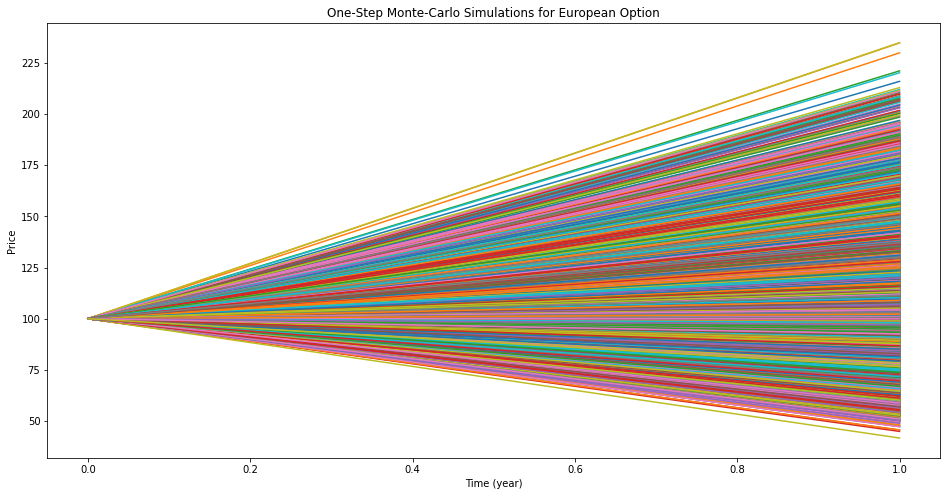

In [9]:
# Plot results
plt.figure(figsize=(16,8))
plt.plot(paths_1_step[:,0:-1])
plt.title("One-Step Monte-Carlo Simulations for European Option")
plt.ylabel("Price")
plt.xlabel("Time (year)")
plt.show()

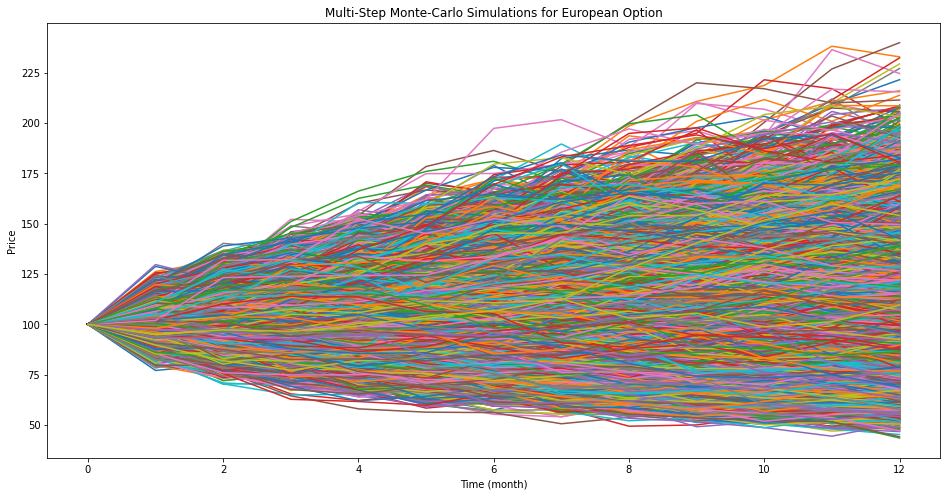

In [10]:
plt.figure(figsize=(16,8))
plt.plot(paths_multi_step[:,0:-1])
plt.title("Multi-Step Monte-Carlo Simulations for European Option")
plt.ylabel("Price")
plt.xlabel("Time (month)")
plt.show()

In [11]:
#Volatility increases and decreases by 10%
callMC_Barrier_Knockin_Price_1_step_inc10, putMC_Barrier_Knockin_Price_1_step_inc10 = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths)
callMC_Barrier_Knockin_Price_multi_step_inc10, putMC_Barrier_Knockin_Price_multi_step_inc10 = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, numSteps, numPaths)

callMC_Barrier_Knockin_Price_1_step_dec10, putMC_Barrier_Knockin_Price_1_step_dec10 = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, numPaths)
callMC_Barrier_Knockin_Price_multi_step_dec10, putMC_Barrier_Knockin_Price_multi_step_dec10 = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, numSteps, numPaths)

print('One-step MC price of an Barrier call option with volatility increased by 10%:' + str(callMC_Barrier_Knockin_Price_1_step_inc10)) 
print('One-step MC price of an Barrier put option with volatility increased by 10%:' + str(putMC_Barrier_Knockin_Price_1_step_inc10)) 
print('Multi-step MC price of an Barrier call option with volatility increased by 10%:' + str(callMC_Barrier_Knockin_Price_multi_step_inc10)) 
print('Multi-step MC price of an Barrier put option with volatility increased by 10%:' + str(putMC_Barrier_Knockin_Price_multi_step_inc10)) 
print('One-step MC price of an Barrier call option with volatility decreased by 10%:' + str(callMC_Barrier_Knockin_Price_1_step_dec10)) 
print('One-step MC price of an Barrier put option with volatility decreased by 10%:' + str(putMC_Barrier_Knockin_Price_1_step_dec10)) 
print('Multi-step MC price of an Barrier call option with volatility decreased by 10%:' + str(callMC_Barrier_Knockin_Price_multi_step_dec10)) 
print('Multi-step MC price of an Barrier put option with volatility decreased by 10%:' + str(putMC_Barrier_Knockin_Price_multi_step_dec10))

One-step MC price of an Barrier call option with volatility increased by 10%:8.628128520979281
One-step MC price of an Barrier put option with volatility increased by 10%:0.0
Multi-step MC price of an Barrier call option with volatility increased by 10%:8.746913089748702
Multi-step MC price of an Barrier put option with volatility increased by 10%:1.5786705884331969
One-step MC price of an Barrier call option with volatility decreased by 10%:7.018445426792787
One-step MC price of an Barrier put option with volatility decreased by 10%:0.0
Multi-step MC price of an Barrier call option with volatility decreased by 10%:7.097571545276242
Multi-step MC price of an Barrier put option with volatility decreased by 10%:0.9749655638134963


In [17]:
paths = [10, 100, 1000, 5000, 10000, 1000000]
res_call_opti, res_put_opti = 0.01, 0.01
num_path_call_opti = 0
num_path_put_opti = 0

for Path in paths:
    callMC_opti, putMC_opti, pathsMC_opti = MC_european_price(S0, K, T, r, mu, sigma, numSteps, Path)
    
    res_call = abs(callMC_opti - call_BS_European_Price)
    if res_call < res_call_opti:
        res_call_opti = res_call
        num_path_call_opti = Path
        callMC_opti = callMC_opti
        
    
    res_put = abs(putMC_opti - putBS_European_Price)
    if res_put < res_put_opti:
        res_put_opti = res_put
        num_path_put_opti = Path
        putMC_opti = putMC_opti

In [19]:
print('optimal number of scenarios:', max(num_path_call_opti, num_path_put_opti))
print('Error in price:', max(res_call_opti,res_put_opti))

optimal number of scenarios: 1000000
Error in price: 0.004449967887824258


In [20]:
steps = [1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
res_call_opti, res_put_opti = 0.01, 0.01
num_step_call_opti = 0
num_step_put_opti = 0

for Step in steps:
    callMC_opti, putMC_opti, pathsMC_opti = MC_european_price(S0, K, T, r, mu, sigma, Step, numPaths)
    
    res_call = abs(callMC_opti - call_BS_European_Price)
    if res_call < res_call_opti:
        res_call_opti = res_call
        num_step_call_opti = Step
        callMC_opti = callMC_opti
        
    
    res_put = abs(putMC_opti - putBS_European_Price)
    if res_put < res_put_opti:
        res_put_opti = res_put
        num_step_put_opti = Step
        putMC_opti = putMC_opti

In [21]:
print('optimal number of time-steps:', max(num_step_call_opti, num_step_put_opti))
print('Error in price:', max(res_call_opti,res_put_opti))

optimal number of time-steps: 40
Error in price: 0.007672450435513234
